<center>
<img src="./images/main_arcada.png" style="width:1400px">
</center>

# Content
* Lecture 1: Intro to MLPP. Supervised Learning (07.10). 
* Lecture 2: Preprocesing and Unsupervised Learning (08.10). 
* **Lecture 3: Model Evaluation and Improvement. Algorithm Chains and Pipelines (21.10).**
* Lecture 4: Representing Data and Engineering Features. Working with text data (22.10). 
* Lecture 5: Introduction to Deep Learning and Deep Learning for Computer Vision (04.11). 
* Lecture 6: Strategies and techniques for cleaning and managing datasets. Wrap-up (05.11). 


<center><img src="./images/00_questions.jpg" alt="Drawing" style="width: 1000px;"/></center>

## Lecture 3: Model Evaluation and Improvement. GridSearch, Algorithm chains and Pipelines
*Resampling methods, Evaluation Metrics and Scoring*


Leonardo A. Espinosa, PhD. <br>Senior Lecturer in Big Data Analytics.<br/>
email: leonardo.espinosaleal@arcada.fi<br/>
Personal webpage: www.espinosaleal.me

# Goals for today
* Find the best sampling method for a given problem.
* Understand the different methods for validating data in a machine learning problem.
* Recognize the different machine learning metrics and its peculiarities.

1\. <a href="#/3/1">Resampling methods</a>

2\. <a href="#/14/1">Grid Search</a>:
   * <a href="#/15/1">Simple</a>.
   * <a href="#/24/1">With cross-validation</a>.
 
3\. <a href="#/41/1">Evaluation Metrics and Scoring</a>
   * <a href="#/42/1">Metrics for Binary Classification</a>.
   * <a href="#/78/1">Metrics for Multiclass Classification</a>.
   * <a href="#/83/1">Using Evaluation Metrics in Model Selection</a>
   
4\. <a href="#/25/1">Algorithm Chains and Pipelines</a>
   
5\. <a href="#/88/1">Conclusions</a>

6\. <a href="#/91/1">Homework</a>

# Summay of session 1 lectures.

* ML problems are supervised or unsupervised.
* Supervised ML problems $\to$ Regression & Classification.
* Unsupervised ML problems $\to$ Dimensionality Reduction & Clustering.

<center><img src="./images/data_squezz.jpg" style="width: 1450px;"/></center>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from IPython.display import display

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


# Resampling methods

* Drawing samples from a training set and reffiting the model of interest on each sample. 
* A way to obtain additional information about the fitted model.

>Model assessment: Evaluating the model performance.

>Model selection: Selecting the proper level of flexibility.

# Cross-Validation
Cross-validation is primarily a way of measuring the predictive performance of a statistical model. 

### K-Fold cross-validation
<center><img src="./images/04-K-fold_cv.png" style="width: 750px;"/></center>

* Avoid *random* bias during selection of train and test data.
* How sensitive is our model to the selection of the training set.
* Computational cost is *k*.

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(solver='liblinear')

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.         0.96666667 0.93333333 0.9        1.        ]


In [4]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


### Stratified k-fold cross validation
<center><img src="./images/04-SK-fold_cv.png" alt="Drawing" style="width: 780px;"/></center>

* Keeps the proportion between classes in each fold as they are in the whole dataset.
* Good strategy with Imbalanced datasets (but use other strategies if proportion is more than 9 to 1).

In [5]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

print("Cross-validation scores:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         0.93333333 0.43333333 0.96666667 0.43333333]


In [6]:
kfold = KFold(n_splits=3)

print("Cross-validation scores:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [7]:
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

print("Cross-validation scores:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.9  0.96 0.96]


### Leave-one-out cross-validation
<center><img src="./images/04-LOO_cv.png" alt="Drawing" style="width: 750px;"/></center>

* Good results in small datasets.
* Warning: Time consuming for large datasets.

In [9]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


### Shuffle-split cross-validation
<center><img src="./images/04-Random_cv.png" alt="Drawing" style="width: 750px;"/></center>

* Good strategy with large datasets.

In [10]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.93333333 0.94666667 0.96       0.92       0.94666667 0.94666667
 0.86666667 0.96       0.88       0.94666667]


# Bootstrapping

Quantify the uncertainty associated with a given estimator or statistical learning method.

* It is *easy* to derive estimates for standard errors and confidence intervals for complex estimators.
* It is not proven to work on finite samples. 

<center><img src="./images/bootstrap.png" alt="Drawing" style="width: 800px;"/></center>


* Not implemented directly in scikit-learn.

<center><img src="./images/00_questions.jpg" alt="Drawing" style="width: 1000px;"/></center>

# Grid Search

Improve the models' generalization performance by tuning its parameters.

<center><img src="./images/heatmap.jpeg" alt="Drawing" style="width: 1000px;"/></center>

> https://blog.ml.cmu.edu/2018/12/12/massively-parallel-hyperparameter-optimization/

## Simple Grid Search

Using *for* loops over the parameters of a model.

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {} size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

Size of training set: 112 size of test set: 38


In [12]:
# naive grid search implementation
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


## Overfiting *parameters* and the Validation Set

* We have tried different parameters and select the best ones on the *test set*.
* Test data should not be use to assess how good is the model.
* A new independent data set is necessary $\to$ Validation set.

<center><img src="./images/04-TVT_sets.png" alt="Drawing" style="width:1000px" align="middle"/></center>

* **Training set**: build the model.
* **Validation set**: select the parameters of the model.
* **Test set**: evaluate the performance of the selected parameters.

After selecting the best parameters using the validation set, we can rebuild a model using the parameter settings we found, but now training on both the training data and the validation data.

In [13]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {} size of validation set: {} size of test set:" 
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 84 size of validation set: 28 size of test set: 38



In [14]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

In [15]:
# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


## Grid Search with Cross-Validation

* For a better estimate of the generalization performance. 

* Instead of using a single split into a training and a validation set, we can use cross-validation to evaluate the performance of each parameter combination.

In [16]:
from sklearn.model_selection import cross_val_score

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

<center><img src="./images/grid_search_workflow.png" alt="Drawing" style="width: 1000px;"/>
Overview of the process of parameter selection and model evaluation with GridSearchCV
</center>

In [17]:
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.97
Best parameters:  {'C': 10, 'gamma': 0.1}
Test set score with best parameters: 0.97


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,120],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.97
Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97

Best estimator:
SVC(C=10, gamma=0.1)


**best$\underline{}$score$\underline{}$** $\to$ The  mean accuracy over the different splits for the parameters setting. On the training set.


### Analyzing the results (cv$\underline{}$results$\underline{}$)

We can inspect the results of the cross-validated grid search.

In [19]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000760,0.000367,0.000291,0.000061,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000542,0.000108,0.000210,0.000056,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000601,0.000130,0.000237,0.000069,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000626,0.000150,0.000321,0.000130,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000492,0.000061,0.000211,0.000033,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


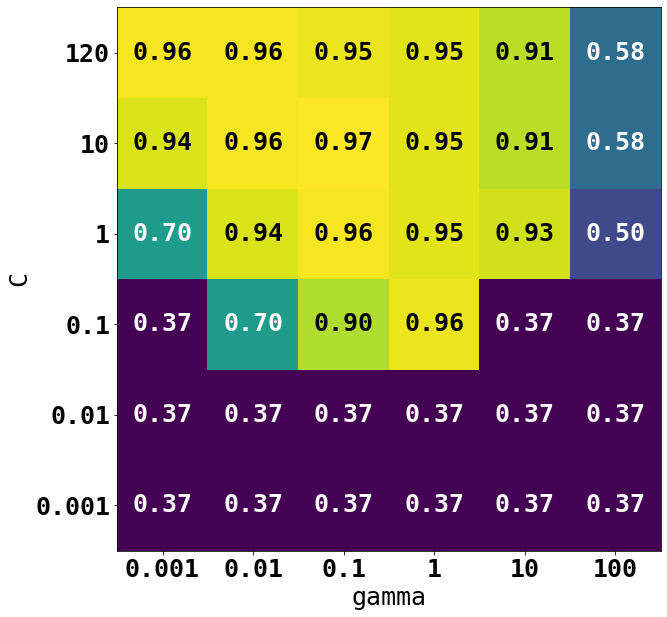

In [20]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [21]:
param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}

In [22]:
svm?

In [23]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 18}
rc('font', **font) 
plt.rcParams['figure.figsize'] = [35, 10]

def plot_params():
    fig, axes = plt.subplots(1, 3)
    for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                               param_grid_range], axes):
        grid_search = GridSearchCV(SVC(), param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

        # plot the mean cross-validation scores
        scores_image = mglearn.tools.heatmap(
                       scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                       yticklabels=param_grid['C'], cmap="viridis", ax=ax)
    plt.colorbar(scores_image, ax=axes.tolist())

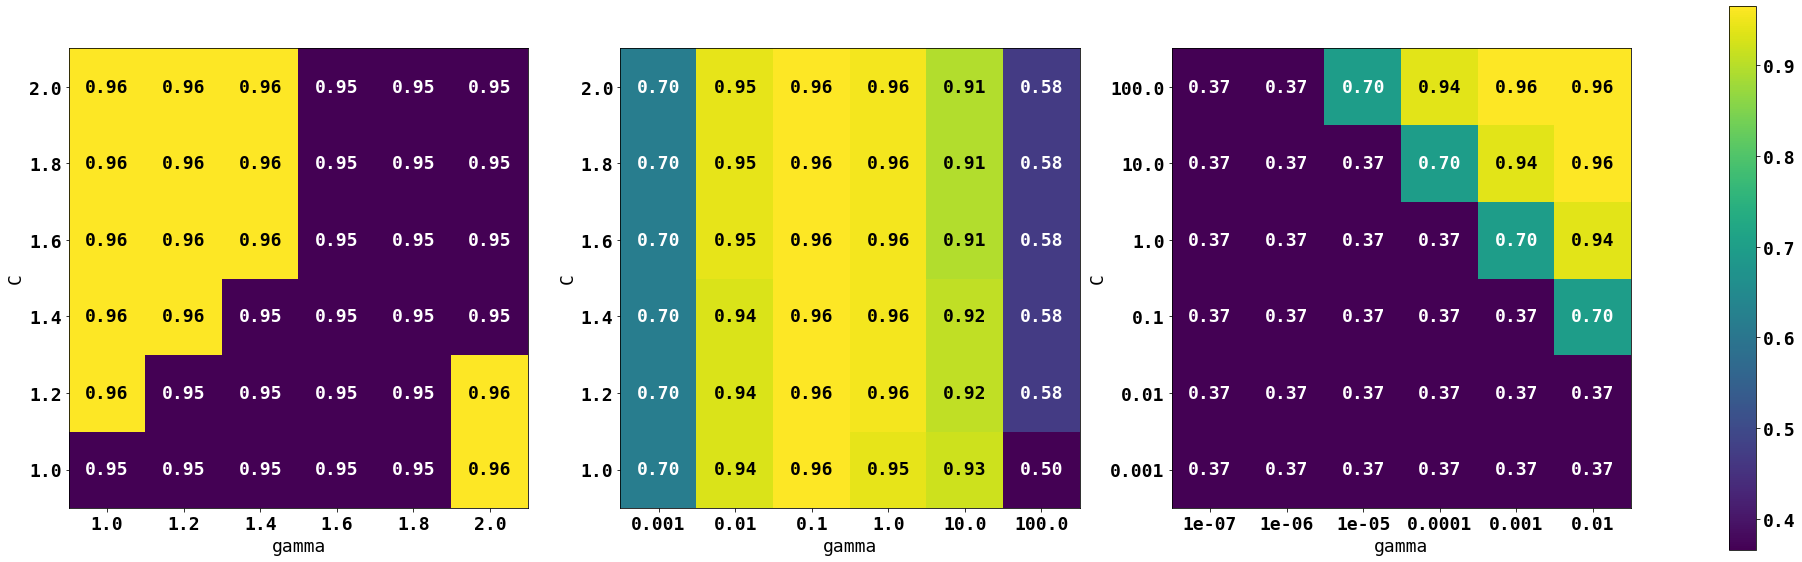

In [24]:
plot_params()

In [25]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 
plt.rcParams['figure.figsize'] = [25, 10]

### Search over spaces (not grids)

* In general is not a good idea.
* But, in some cases is possible to try *all possible* combinations of *all paramenters*.
* Pass to GridSearch a **list of dictionaries**. Each dictionary an independent grid.

In [26]:
# We test the SVC classifier with two type of kernels.
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [27]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00102143,0.000567532,0.00057497,0.00046854,0.000490952,0.000702477,0.000461102,0.000490999,0.000529861,0.000496101,...,0.000302887,0.000379992,0.000682449,0.0007689,0.000502157,0.000457096,0.000418854,0.000413513,0.000397635,0.00035243
std_fit_time,0.000425774,2.79467e-05,0.000103045,8.33835e-05,0.00012609,0.000156086,6.19051e-05,9.74901e-05,0.000103231,7.81074e-05,...,3.63125e-05,3.85296e-05,5.87226e-06,7.03091e-05,5.33466e-05,0.000135602,0.00012732,8.37786e-05,5.51689e-05,7.68326e-05
mean_score_time,0.000402784,0.000280428,0.000256443,0.000180292,0.000191975,0.000340462,0.000226641,0.000223351,0.000221634,0.000212049,...,0.000160027,0.000182343,0.000227308,0.000373554,0.000211763,0.000192976,0.000244284,0.000183535,0.000190401,0.000156021
std_score_time,0.000136705,5.62475e-05,7.92861e-05,1.33586e-05,4.49251e-05,5.87037e-05,6.2705e-05,6.48704e-05,8.50935e-05,6.40298e-05,...,2.27858e-05,3.69607e-05,4.7865e-05,0.000149493,4.71716e-05,4.43701e-05,5.73492e-05,3.03343e-05,4.03187e-05,1.67963e-05
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,0.956522,0.869565,0.521739,0.347826,0.869565,1,1,1,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1,0.956522


## Extra info


* You can Parallelize the cross-validation and grid search by passing the option `n_jobs=-1`

* GridSearchCV uses stratified *k*-fold cross-validation by default. But you can change it by passing a different
instruction to the **cv** variable. eg. 

    ```from sklearn.model_selection import LeaveOneOut
  loo = LeaveOneOut()
  grid_search = GridSearchCV(SVC(), param_grid, cv=loo)```



<center><img src="./images/00_questions.jpg" alt="Drawing" style="width: 1000px;"/></center>


<center>
<img src="./images/00_hands-on.jpg" style="width:1200px">
</center>

## Hands-on exercise

Fit a classifier on the wine dataset with *GridSearchCV*. Follow the example on https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.datasets import load_wine

Xw, yw = load_wine(return_X_y=True)

<center><img src="./images/00_questions.jpg" alt="Drawing" style="width: 1000px;"/></center>

<center>
<img src="./images/break.png" style="width:1200px">
</center>

# Evaluation Metrics and Scoring

<center>
<img src="./images/scoring.gif" style="width:1200px">
</center>

## Uncertainty Estimates from Classifiers

* A very useful part of the scikit-learn interface that we haven't talked about yet is the ability of classifiers to provide uncertainty estimates of predictions.
* Often, you are not only interested in which class a classifier predicts for a certain test point, but also how certain it is that this is the right class.

There are two different functions in scikit-learn that can be used to obtain uncer‐
tainty estimates from classifiers: *decision_function* and *predict_proba*.

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes "blue" and "red" for illustration purposes
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

### The Decision Function
In the binary classification case, the return value of *decision_function* is of shape *(n_samples,)* , and it returns one floating-point number for each sample:

In [29]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


In [30]:
# show the first few entries of decision_function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [31]:
print("Thresholded decision function:\n{}".format(gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


The range of decision_function can be arbitrary, and depends on the data and the model parameters:

In [32]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(np.min(decision_function), 
                                                                 np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


This arbitrary scaling makes the output of decision_function often hard to interpret.

In [33]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 24}
rc('font', **font) 

def plot_db():

    fig, axes = plt.subplots(1, 2, figsize=(25, 10))
    mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                    fill=True, cm=mglearn.cm2)
    scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                                alpha=.4, cm=mglearn.ReBl)

    for ax in axes:
    # plot training and test points
        mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                                markers='^', ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                            markers='o', ax=ax)
        ax.set_xlabel("Feature 0")
        ax.set_ylabel("Feature 1")
    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
    "Train class 1"], ncol=4, loc=(.1, 1.1))

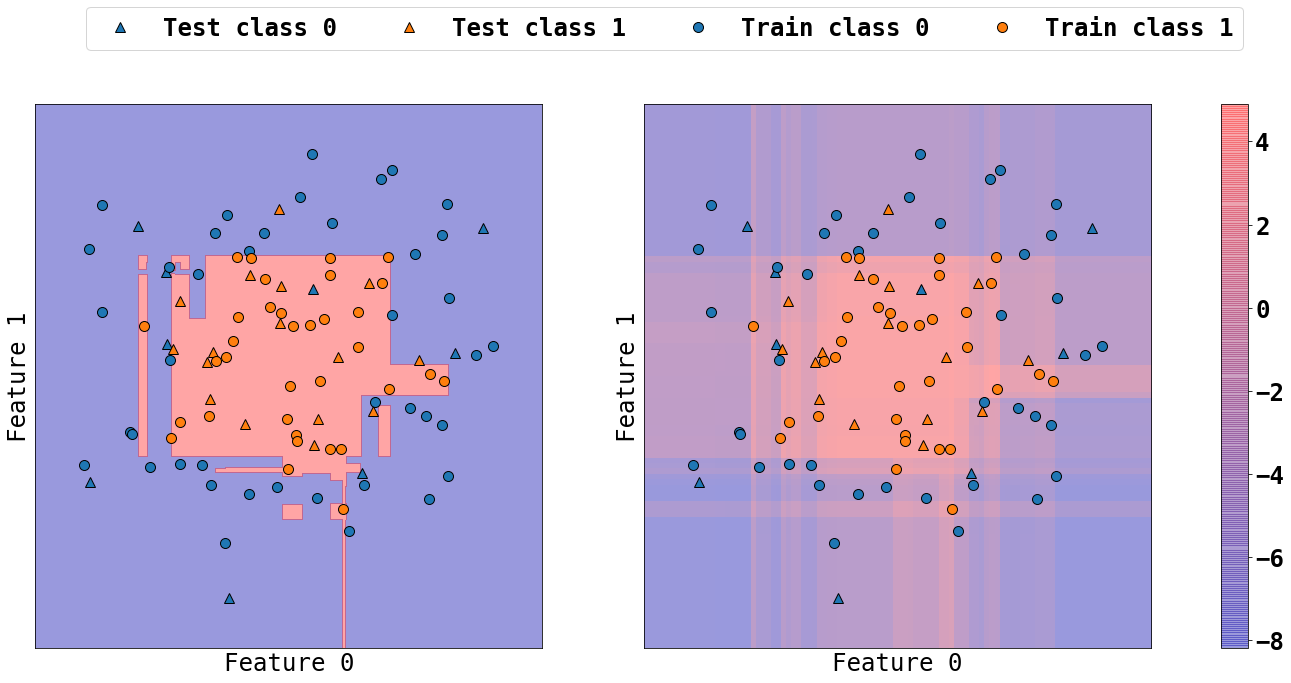

In [34]:
plot_db()

Decision boundary (left) and decision function (right) for a gradient boosting model on a two-dimensional toy dataset.

### Predicting Probabilities

The output of predict_proba is a probability for each class, and is often more easily understood than the output of *decision_function* . It is always of shape *(n_samples,2)* for binary classification:

In [35]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


The first entry in each row is the estimated probability of the first class, and the second entry is the estimated probability of the second class. Because it is a probability, the output of predict_proba is always between 0 and 1, and the sum of the entries for both classes is always 1:

In [36]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(
                                            gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


Probabilities should sum to 1.

In [37]:
def plot_pp():

    fig, axes = plt.subplots(1, 2, figsize=(25, 10))

    mglearn.tools.plot_2d_separator(
        gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
    scores_image = mglearn.tools.plot_2d_scores(
        gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

    for ax in axes:
    # plot training and test points
        mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                                markers='^', ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                                markers='o', ax=ax)
        ax.set_xlabel("Feature 0")
        ax.set_ylabel("Feature 1")
    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
    "Train class 1"], ncol=4, loc=(.1, 1.1))

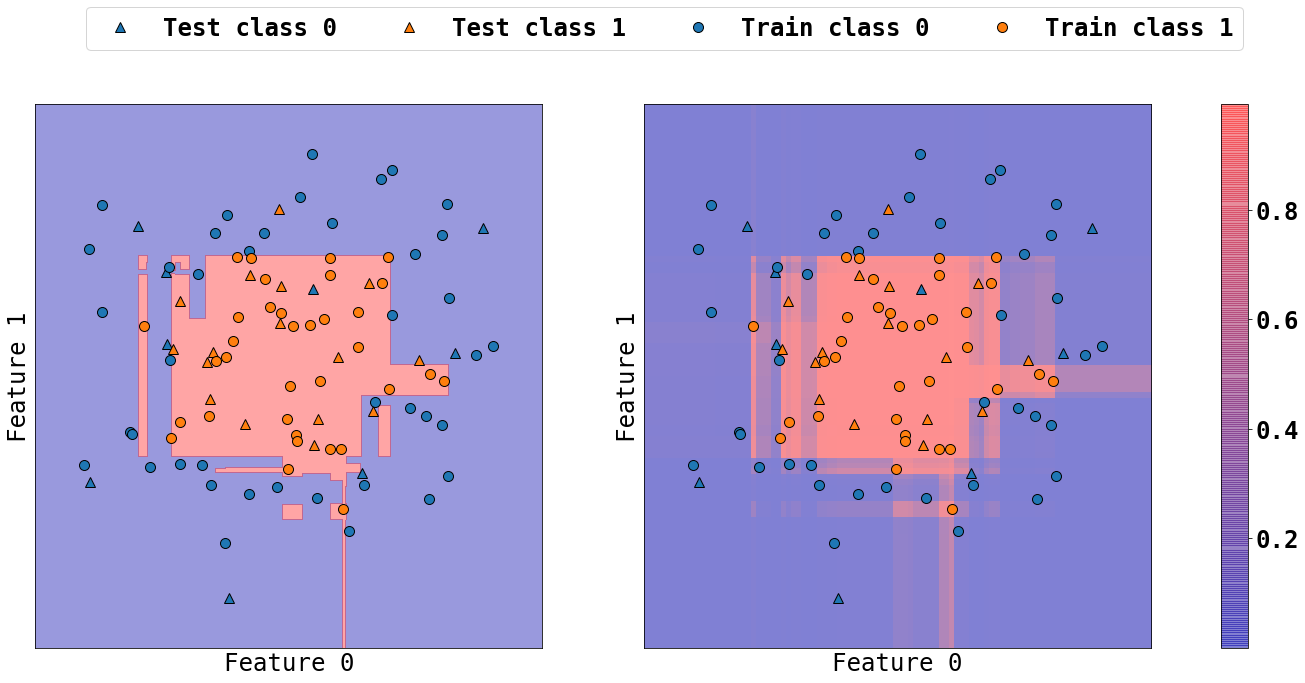

In [38]:
plot_pp()

Decision boundary (left) and predicted probabilities for the gradient boosting model shown in previous figure.

### Uncertainty in Multiclass Classification

What about multiclass problems?

In [39]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [40]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
# plot the first few entries of the decision function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In the multiclass case, the decision_function has the shape *(n_samples,n_classes)*

In [41]:
print("Argmax of decision function:\n{}".format(
    np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


The output of predict_proba has the same shape, (n_samples, n_classes) .

Again, the probabilities for the possible classes for each data point sum to 1:

In [42]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# show that sums across rows are one
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums: [1. 1. 1. 1. 1. 1.]


In [43]:
# We can again recover the predictions by computing the argmax of predict_proba :

print("Argmax of predicted probabilities:\n{}".format(np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [44]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data: {}".format(logreg.classes_))
print("predictions: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function: {}".format(argmax_dec_func[:10]))
print("argmax combined with classes_: {}".format(
    logreg.classes_[argmax_dec_func][:10]))

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


## Conclusion

Most classifiers are able to predict in terms of probabilities. This fact can be used to present and estimation of the prediction.

<center><img src="./images/00_questions.jpg" alt="Drawing" style="width: 1000px;"/></center>

<center>
<img src="./images/metrics.png" style="width:1200px">
</center>

Default evaluation metrics in scikit-learn
* for classification: *accuracy*
* for regression: $R^2$

$R^2$ for regression is the usual one. It is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. However you can also use *Mean Absolute Error* or *Mean Squared Error* but the cases are limited. 

# Warning

* Armstrong and Collopy (1992) stated that RMSE (arguably one of the top-used metrics) was not reliable, and was inappropriate for comparing accuracy across time series.

* Makridakis (1993) criticized the use of RAE as not meaningful for decision making.

* Li (2017) asserted that correlation coefficient (R) and the coefficient of determination (R^2) should not be used as measures to assess the accuracy of predictive models for numerical data (because they are biased, insufficient or misleading).

Performance Metrics (Error Measures) in Machine Learning Regression, Forecasting and Prognostics: Properties and Typology by Alexei Botchkarev (https://arxiv.org/pdf/1809.03006.pdf)

*When selecting a metric, you should always have the end goal of the machine learning application in mind.*

> business metric $\to$ business impact.

**Warning: be careful with imbalanced datasets**

In [45]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [46]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [47]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [48]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.01,solver='liblinear').fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.83
logreg score: 0.98


## Confusion matrices

* rows $\to$ true classes
* columns $\to$ predicted classes

In [49]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[401   2]
 [  7  40]]


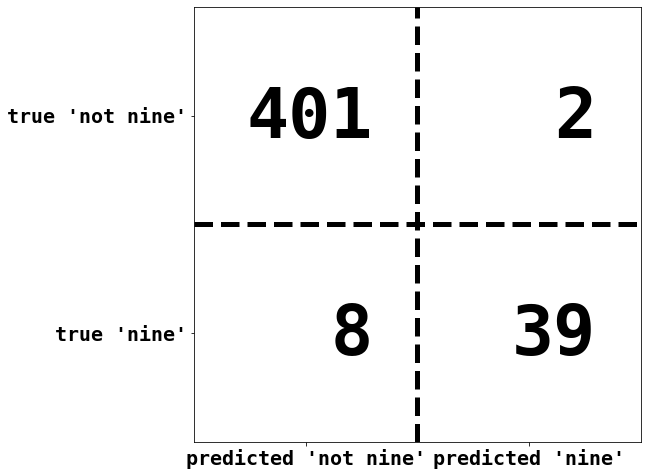

In [50]:
mglearn.plots.plot_confusion_matrix_illustration()

This is  just an illustration. Numbers can be different than in previous calculations.

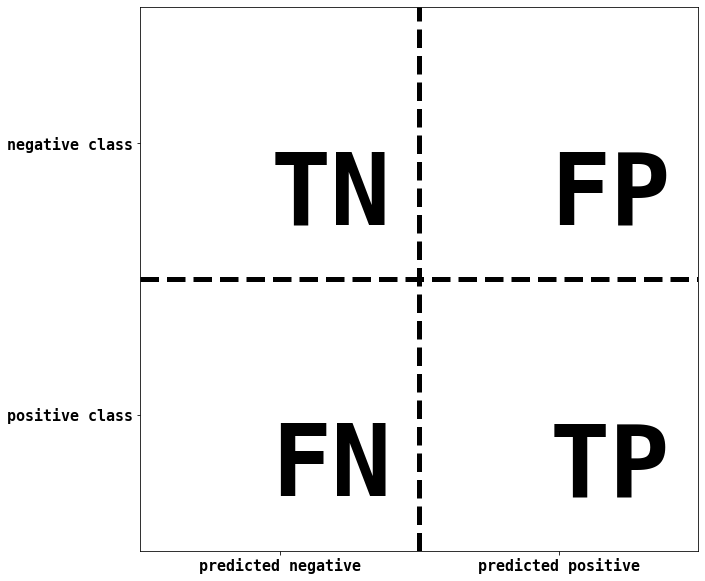

In [51]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 
plt.rcParams['figure.figsize'] = [10, 10]
mglearn.plots.plot_binary_confusion_matrix()

In [52]:
print("Most frequent class:")
print(confusion_matrix(y_test,pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test,pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test,pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[359  44]
 [ 42   5]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  7  40]]


## Accuracy: $\frac{TP+TN}{TP + TN + FP + FN}$

* Precision: $\frac{TP}{TP + FP}$ (fraction of relevant instances among the retrieved instances)

* Recall:    $\frac{TP}{TP + FN}$  (fraction of the total amount of relevant instances that were actually retrieved) 

* f-score:  $2\cdot \frac{precision\cdot recall}{precision+recall}$ (harmonic mean of precision and recall)

<center><img src="./images/precisionrecall.png" style="width: 1000px;"/></center>

<center><img src="./images/cm1.png" style="width: 1100px;"/></center>

<center><img src="./images/cm2a.png" style="width: 1000px;"/></center>

<center><img src="./images/cm2b.png" style="width: 1000px;"/></center>

<center><img src="./images/cm3.png" style="width: 1000px;"/></center>


In [53]:
from sklearn.metrics import f1_score

print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.10
f1 score tree: 0.55
f1 score logistic regression: 0.90


In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent,target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/home/leonardo/miniconda3/envs/env-bda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
print(classification_report(y_test, pred_dummy,target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      0.89      0.89       403
        nine       0.10      0.11      0.10        47

    accuracy                           0.81       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.81      0.81      0.81       450



In [56]:
print(classification_report(y_test, pred_logreg,target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.85      0.90        47

    accuracy                           0.98       450
   macro avg       0.97      0.92      0.94       450
weighted avg       0.98      0.98      0.98       450



## Taking uncertainty into account

Most of classifiers provide a:

* *decision_function*
* *predict_proba*

You can modify the output by tuning a threshold.

>If you do set a threshold, don't use the test set. As with any other parameter, setting a decision threshold on the test set is likely to yield overly optimistic results. Use a validation set or cross-validation instead.

In [57]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 12}
rc('font', **font) 
plt.rcParams['figure.figsize'] = [35, 10]

from mglearn.datasets import make_blobs

X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.1).fit(X_train, y_train)

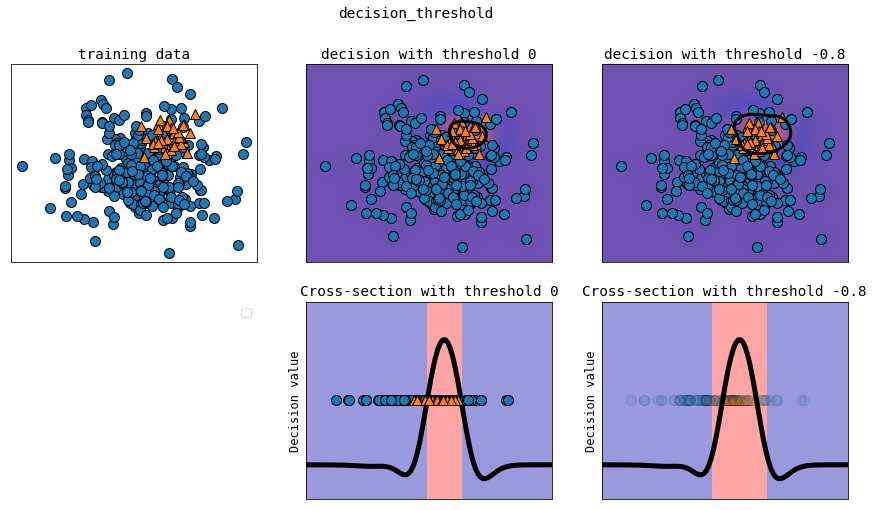

In [58]:
mglearn.plots.plot_decision_threshold()

In [59]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       104
           1       0.29      0.67      0.40         9

    accuracy                           0.84       113
   macro avg       0.63      0.76      0.65       113
weighted avg       0.91      0.84      0.87       113



In [60]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       104
           1       0.31      1.00      0.47         9

    accuracy                           0.82       113
   macro avg       0.66      0.90      0.68       113
weighted avg       0.95      0.82      0.86       113



## Precision-recall curves and ROC curves

Adjust the trade-off of precision and recall for a given classifier.

In [61]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['lines.markersize'] = 20

In [62]:
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2],
random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
y_test, svc.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
y_test, rf.predict_proba(X_test)[:, 1])

In [63]:
def plot_pre_rec():
    plt.plot(precision, recall, label="svc")
    plt.plot(precision[close_zero], recall[close_zero], 'o',
             label="threshold zero svc", fillstyle="none", c='k', mew=2)
    plt.plot(precision_rf, recall_rf, label="rf")
    close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
    plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', 
             label="threshold 0.5 rf", fillstyle="none", mew=2)
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.legend(loc="best")

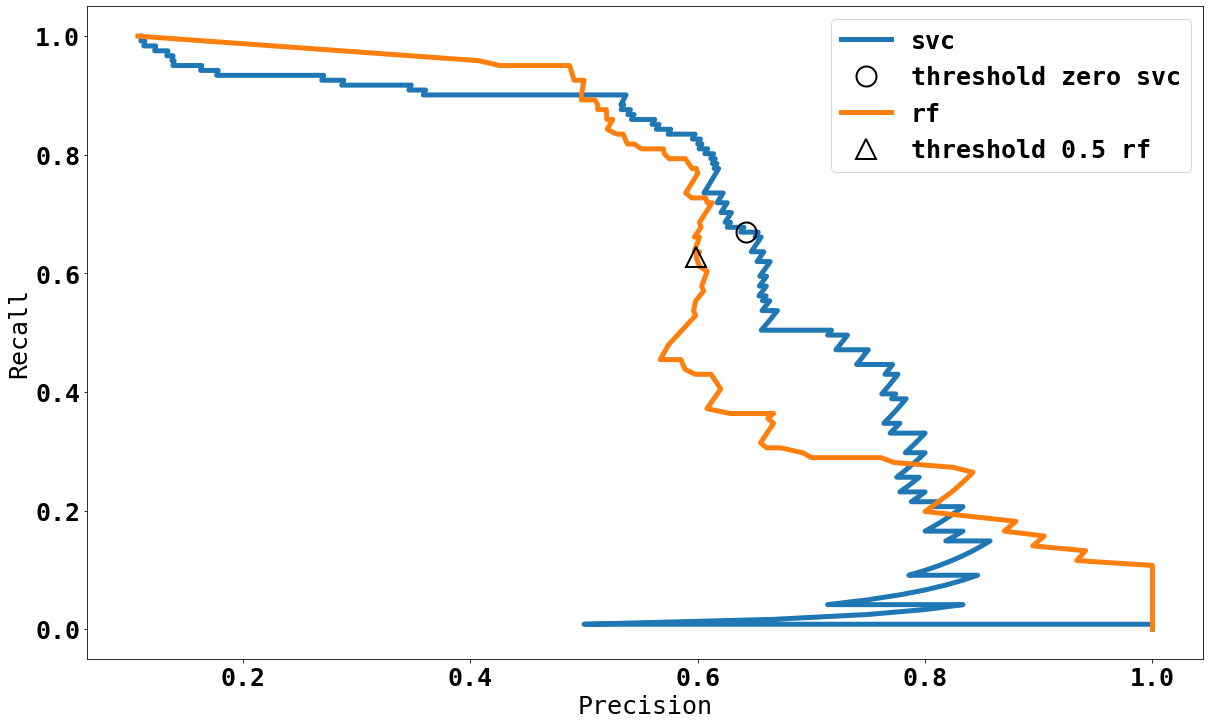

In [64]:
plot_pre_rec()

In [65]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


## Receiver operating characteristics (ROC) and AUC
* false positive rate (FPR) against the true positive rate (TPR)

<center><img src="./images/ROC_space.png" style="width: 850px;"/></center>


In [66]:
from sklearn.metrics import roc_curve

def plot_roc_curve():
    fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

    close_zero = np.argmin(np.abs(thresholds))

    plt.plot(fpr, tpr, label="ROC Curve SVC")
    plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', 
    label="threshold zero SVC", fillstyle="none", c='k', mew=2)
    close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
    plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^',
    label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
    plt.legend(loc=4)

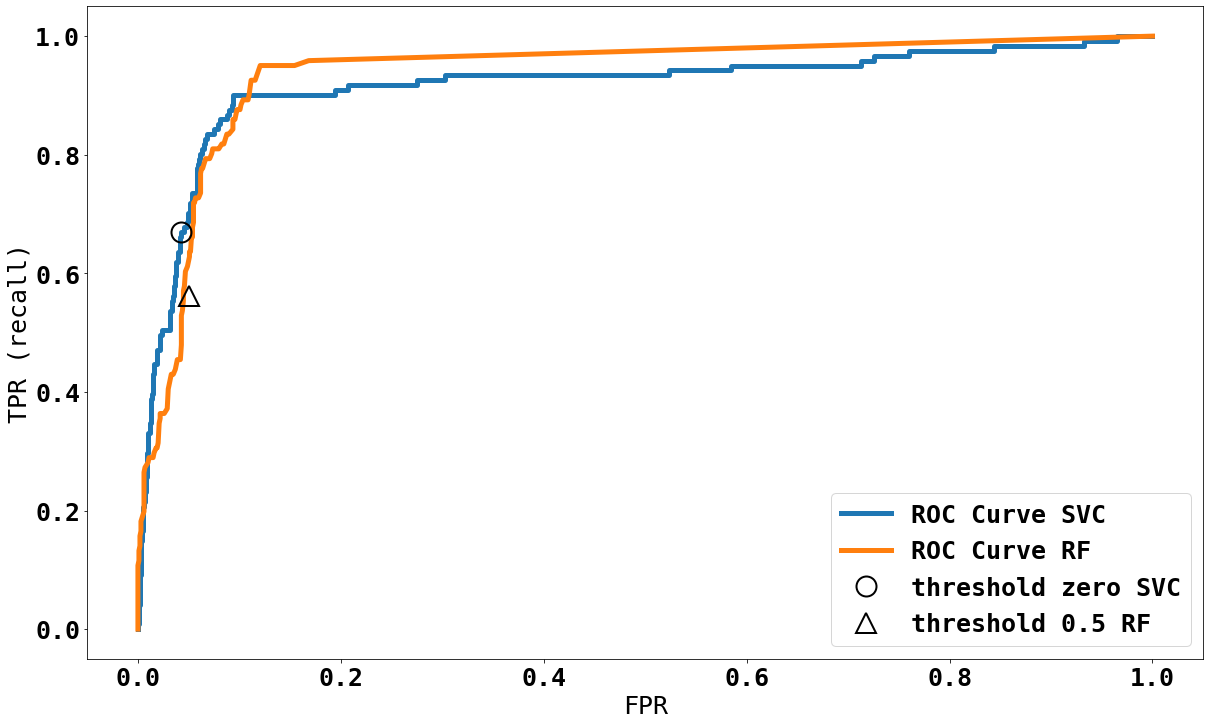

In [67]:
plot_roc_curve()

In [68]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


*AUC is a better metric for imbalanced classification problems than accuracy.*

## Metrics for Multiclass Classification

Same than binary classification metrics, but averaged over all classes.

In [69]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
digits.data, digits.target, random_state=0)
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


In [70]:
def plot_conf_matrix():
    scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
    plt.title("Confusion matrix")
    plt.gca().invert_yaxis()

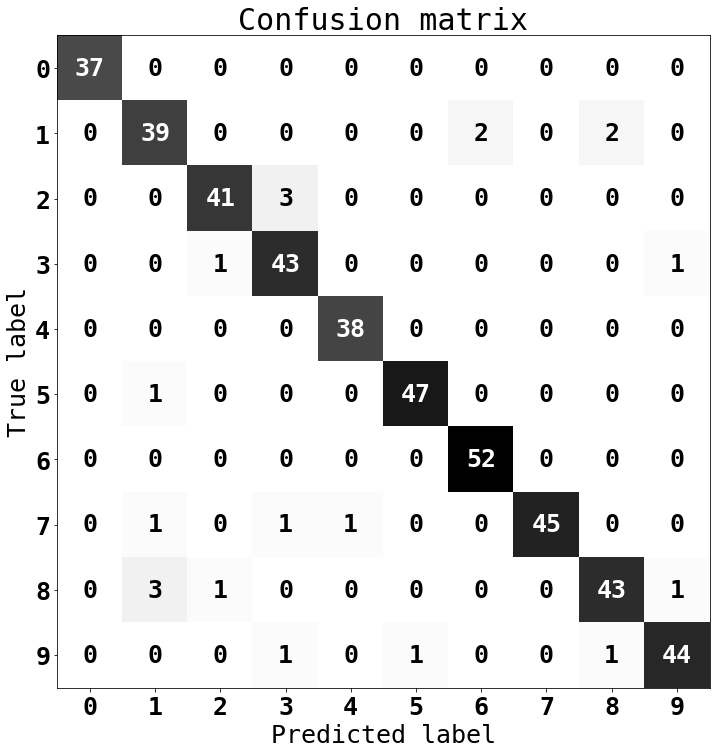

In [71]:
plot_conf_matrix()

In [72]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



## Using Evaluation Metrics in Model Selection

How to include your metric in your model selection using GridSearchCV or cross_val_score.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)
# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [74]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000


In [75]:
from sklearn.metrics.scorer import SCORERS
print("Available scorers:\n{}".format(sorted(SCORERS.keys())))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


<center><img src="./images/00_questions.jpg" alt="Drawing" style="width: 1000px;"/></center>

# Conclusions

* Cross-validation or the use of a test set allow us to evaluate a machine learning model as it will perform in the future.
* Make sure that the metric you choose to evaluate and select a model for is a good stand-in for what the model will actually be used for.

<center>
<img src="./images/00_hands-on.jpg" style="width:1200px">
</center>

### Hands-on exercise

Here we explore the pipeline class.

* Create a pipeline class combining one scaler and one model.
* Run a gridsearch with this pipeline on the wine dataset.

In [76]:
from sklearn.datasets import load_wine

Xw, yw = load_wine(return_X_y=True)

<center>
<img src="./images/break.png" style="width:1200px">
</center>

# Algorithm Chains and Pipelines

<center>
<img src="./images/datapipeline.png" style="width:1200px">
</center>

## Pipeline and GridSearchCV Classes

A machine learning problem usually includes:

* Scaling the data and combining features by hand. Learning features using unsupervised machine learning.

* Chaining together many different processing steps and machine learning models.

In [77]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# load and split the data
cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# compute minimum and maximum on the training data
scaler = MinMaxScaler().fit(X_train)

# rescale the training data
X_train_scaled = scaler.transform(X_train)

svm = SVC()

# learn an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
#svm.fit(X_train, y_train)

# scale the test data and score the scaled data
X_test_scaled = scaler.transform(X_test)
print("Test score: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test score: 0.97


## Parameter Selection with Preprocessing

* Find the best parameters for *SVC* using *GridSearch* $\to$ Just add the grid parameters.

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best set score: {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("Best parameters: ", grid.best_params_)

Best cross-validation accuracy: 0.98
Best set score: 0.97
Best parameters:  {'C': 1, 'gamma': 1}


# ERROR $\Rightarrow$ The grid search is done using the scaled data!
* But the scaled data was done on the whole data in the training set.
* For each split in the cross-validation some information is leaked from the test set into the training set.

<center><img src="./images/04-pipelines.png" alt="Drawing" style="width:1500px" align="middle"/></center>


# The *Pipeline* Class

You can create a *workflow* for training and classification after preprocessing.

In [79]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

pipe.fit(X_train, y_train)
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.97


## Pipelines in Grid Searches
Pipelines and grid search are combined in the same way that any estimator.

In [80]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
               'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.98
Test set score: 0.97
Best parameters: {'svm__C': 1, 'svm__gamma': 1}


# Information Leakage

Example adapted from *The Elements of Statistical Learning*.

In [81]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))

In [82]:
from sklearn.feature_selection import SelectPercentile, f_regression
select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)
print("X_selected.shape: {}".format(X_selected.shape))

X_selected.shape: (100, 500)


In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
print("Cross-validation accuracy (cv only on ridge): {:.2f}".format(
    np.mean(cross_val_score(Ridge(), X_selected, y, cv=5))))

Cross-validation accuracy (cv only on ridge): 0.91


$R^2$ computed by cross-validation is around 0.9 $\to$ a very good model. **ERROR**

## Proper model with cross-validation using a pipeline

In [84]:
pipe = Pipeline([("select", SelectPercentile(score_func=f_regression, 
                 percentile=5)),("ridge", Ridge())])

print("Cross-validation accuracy (pipeline): {:.2f}".format(np.mean(cross_val_score(pipe, X, y, cv=5))))

Cross-validation accuracy (pipeline): -0.25


a negative $R^2$ score, indicating a very poor model.

## Pipeline Creation with make_pipeline

In [85]:
from sklearn.pipeline import make_pipeline
# standard syntax
pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
# abbreviated syntax
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

print("Pipeline steps:\n{}".format(pipe_short.steps))

Pipeline steps:
[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]


In general, the step names are just lowercase versions of the class names.

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print("Pipeline steps:\n{}".format(pipe.steps))

Pipeline steps:
[('standardscaler-1', StandardScaler()), ('pca', PCA(n_components=2)), ('standardscaler-2', StandardScaler())]


**Note:** In this case it might be better to use the Pipeline construction with explicit name.

## Grid-Searching Preprocessing Steps and Model Parameters

In [87]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,random_state=0)

In [88]:
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(),Ridge())

param_grid = {'polynomialfeatures__degree': [1, 2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=2)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=2,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

<Figure size 720x720 with 0 Axes>

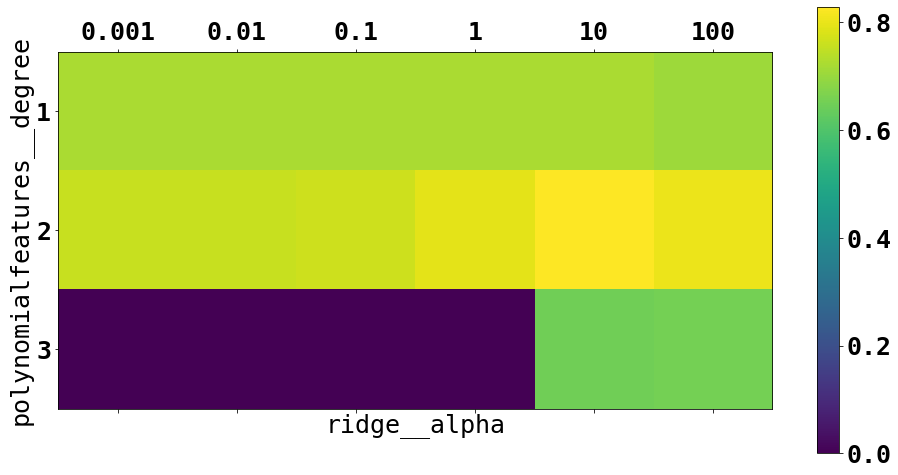

In [89]:
plt.figure(figsize=(10,10))
plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1),
            vmin=0, cmap="viridis")
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),
param_grid['polynomialfeatures__degree'])
plt.colorbar()

In [90]:
print("Best parameters: {}".format(grid.best_params_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}
Test-set score: 0.77


## Exhaustive Grid Search
* Again, it is not a recomendable strategy.
* If your dataset is large you can try on a random subset.

In [91]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=4)
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier': SVC(C=10, gamma=0.01), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}

Best cross-validation score: 0.99
Test-set score: 0.98


## Randomized Parameter Optimization

`RandomizedSearchCV` implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values.

Advantages:
* A budget can be chosen independent of the number of parameters and possible values.
* Adding parameters that do not influence the performance does not decrease efficiency.

See: Bergstra, J. and Bengio, Y., Random search for hyper-parameter optimization, The Journal of Machine Learning Research (2012).

In [100]:
from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier

# get some data
X, y = load_digits(return_X_y=True)

# build a classifier
clf = SGDClassifier(loss='hinge', penalty='elasticnet',fit_intercept=True, max_iter=1000)

In [97]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [98]:
# specify parameters and distributions to sample from
param_dist = {'average': [True, False],
              'l1_ratio': stats.uniform(0, 1),
              'alpha': loguniform(1e-4, 1e0)}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 17.72 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.926 (std: 0.033)
Parameters: {'alpha': 0.000328506472483906, 'average': True, 'l1_ratio': 0.36160161334686736}

Model with rank: 2
Mean validation score: 0.925 (std: 0.028)
Parameters: {'alpha': 0.0006793736916480022, 'average': True, 'l1_ratio': 0.38346763666187433}

Model with rank: 3
Mean validation score: 0.924 (std: 0.029)
Parameters: {'alpha': 0.0007531013863486964, 'average': True, 'l1_ratio': 0.10112741719147367}



In [101]:
# use a full grid over all parameters
param_grid = {'average': [True, False],
              'l1_ratio': np.linspace(0, 1, num=10),
              'alpha': np.power(10, np.arange(-4, 1, dtype=float))}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

/home/leonardo/miniconda3/envs/env-bda/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/leonardo/miniconda3/envs/env-bda/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/leonardo/miniconda3/envs/env-bda/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/leonardo/miniconda3/envs/env-bda/lib/python3.8/site-packages/sklearn/linear_model/

GridSearchCV took 86.63 seconds for 100 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.931 (std: 0.025)
Parameters: {'alpha': 0.0001, 'average': True, 'l1_ratio': 0.3333333333333333}

Model with rank: 2
Mean validation score: 0.928 (std: 0.027)
Parameters: {'alpha': 0.0001, 'average': True, 'l1_ratio': 0.7777777777777777}

Model with rank: 3
Mean validation score: 0.927 (std: 0.030)
Parameters: {'alpha': 0.1, 'average': True, 'l1_ratio': 0.0}



## GridSearchCV 2.0 -- New and Improved

Cutting edge hyperparameter tuning techniques (bayesian optimization, early stopping, distributed execution) can provide significant speedups over grid search and random search.

<center>
<img src="./images/tune+sklearn.png" style="width:800px">
    https://github.com/ray-project/tune-sklearn
</center>

### Tune: Scalable Hyperparameter Tuning

Tune is a Python library for experiment execution and hyperparameter tuning at any scale (https://docs.ray.io/en/latest/tune.html). Core features:

* Launch a multi-node distributed hyperparameter sweep in less than 10 lines of code.

* Supports any machine learning framework, including PyTorch, XGBoost, MXNet, and Keras.

* Natively integrates with optimization libraries such as HyperOpt, Bayesian Optimization, and Facebook Ax.

* Choose among scalable algorithms such as Population Based Training (PBT), Vizier’s Median Stopping Rule, HyperBand/ASHA.

* Visualize results with TensorBoard.

* Move your models from training to serving on the same infrastructure with Ray Serve.

Here’s what tune-sklearn has to offer:

* Consistency with Scikit-Learn API: tune-sklearn is a drop-in replacement for GridSearchCV and RandomizedSearchCV, so you only need to change less than 5 lines in a standard Scikit-Learn script to use the API.
* Modern hyperparameter tuning techniques: tune-sklearn is the only Scikit-Learn interface that allows you to easily leverage Bayesian Optimization, HyperBand, and other optimization techniques by simply toggling a few parameters.
* Framework support: tune-sklearn is used primarily for tuning Scikit-Learn models, but it also supports and provides examples for many other frameworks with Scikit-Learn wrappers such as Skorch (Pytorch), KerasClassifiers (Keras), and XGBoostClassifiers (XGBoost).
* Scale up: Tune-sklearn leverages Ray Tune, a library for distributed hyperparameter tuning, to efficiently and transparently parallelize cross validation on multiple cores and even multiple machines.

# Conclusions
* Split into training data for model building, validation data for model and parameter selection, and test data for model evaluation.
* The Pipeline class is a general-purpose tool to chain together multiple processing steps in a machine learning workflow.
* Choosing the right combination of feature extraction, preprocessing, and models is somewhat of an art, and often requires some trial and error.

<center>
<img src="./images/00_questions.jpg" style="width:1200px">
</center>

## Tips for parameter search

* **Specifying an objective metric**. For some applications, other scoring functions are better suited
* **Specifying multiple metrics for evaluation**. `GridSearchCV` and `RandomizedSearchCV` allow specifying multiple metrics for the scoring parameter.
* **Composite estimators and parameter spaces**. Use pipelines and caching transformers to avoid repeated computation. See `sklearn` manual.
* **Parallelism**.
* **Robustness to failure**. Setting `error_score=0` (or `=np.NaN`) will make the procedure robust to such failure.

## Alternatives to brute force parameter search

* **Model specific cross-validation**. Some models can fit data for a range of values of some parameter almost as efficiently as fitting the estimator for a single value of the parameter. This feature can be leveraged to perform a more efficient cross-validation used for model selection of this parameter. eg. `linear_model.RidgeCV`, `linear_model.LogisticRegressionCV`.
* ** Information Criterion**. Some models can offer an information-theoretic closed-form formula of the optimal estimate of the regularization parameter by computing a single regularization path (instead of several when using cross-validation). eg. `linear_model.LassoLarsIC`
* **Out of Bag Estimates**. When using ensemble methods base upon bagging, i.e. generating new training sets using sampling with replacement, part of the training set remains unused. For each classifier in the ensemble, a different part of the training set is left out. eg. `ensemble.RandomForestClassifier`, `ensemble.GradientBoostingClassifier`


<center>
<img src="./images/00_questions.jpg" style="width:1200px">
</center>

Recommended reading:

* Model Evaluation, Model Selection, and Algorithm Selection in Machine Learning by Sebastian Raschka. https://arxiv.org/abs/1811.12808

<center>
<img src="./images/00_hmw.png" style="width:1200px">
</center>

### Assigment for the third lecture

#### Task 1:

* Download the data (*sonar.all-data*) from the *Sonar, Mines vs. Rocks Data Set*: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
* Substitute the categories M and R of the last column for integers.
* Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model.
* Plot a heatmap of the parameters. 
* Plot a ROC curve.

#### Tasks 2:

Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

* Download the data from the *Cardiotocography Data Set*: https://archive.ics.uci.edu/ml/datasets/Cardiotocography
* Find the best two models by creating a complete pipeline. One model should predict the *morphologic pattern* and the other the *fetal state*. 

<center>
<img src="./images/00_thats_all.jpg" style="width:1200px">
</center>